In [ ]:
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from skimage.feature import hog
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
%matplotlib inline

# Random forest with features being RGB and HOG, accuracy of approx 45%

In [ ]:
def loadImg(arr):
    a = []
    for path in arr:
        img = cv.imread(path)
        img = cv.resize(img, (64, 64))

        a.append(img)
    
    return a

def hog_features(arr):
    a = []
    for f in arr:
        img = cv.cvtColor(f, cv.COLOR_BGR2GRAY)
        bin = hog(img)
        a.append(bin)

    return a

def getData(arr, lbp):
    a = []
    for i in range(len(arr)):
        m = arr[i].ravel()
        l = lbp[i].ravel()

        a.append(np.append(m, l, axis= 0))

    return a

In [3]:
all_categories = [
            'Agriculture', 'Airport', 'Beach', 'City', 'Desert',
            'Forest', 'Grassland', 'Highway', 'Lake', 'Mountain',
            'Parking', 'Port', 'Railway', 'Residential', 'River'
]

data = []
data_class = []
for cat in all_categories:
    for i in range(800):
        data.append(os.path.join('data', cat, "{0:03}".format(i + 1) + ".jpg"))
        data_class.append(cat)

<BarContainer object of 15 artists>

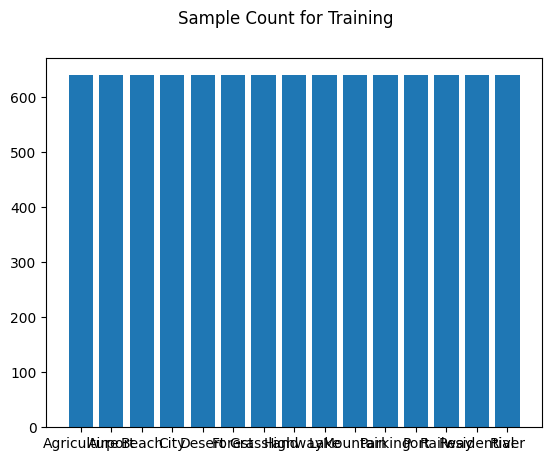

In [4]:
train_x, test_x, train_y, test_y = train_test_split(data, data_class, train_size= 0.8, stratify= data_class)

unique, count = np.unique(train_y, return_counts= True)

fig, ax = plt.subplots()
fig.suptitle('Sample Count for Training')
ax.bar(unique, count)

In [5]:
# Load images for training
train_img_x = loadImg(train_x)
test_img_x = loadImg(test_x)

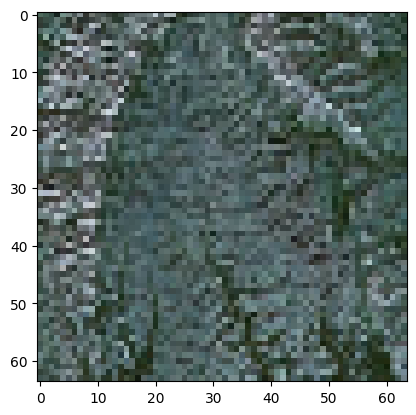

In [6]:
plt.imshow(train_img_x[1])

In [7]:
train_lbp = hog_features(train_img_x)

In [8]:
test_lbp = hog_features(test_img_x)

In [9]:
train_data_x = getData(train_img_x, train_lbp)
test_data_x = getData(test_img_x, test_lbp)

In [10]:
classifier = RandomForestClassifier()
classifier.fit(train_data_x, train_y)

RandomForestClassifier()

In [11]:
pred = classifier.predict(test_data_x)

Accuracy: 46.62%
              precision    recall  f1-score   support

 Agriculture       0.33      0.37      0.35       160
     Airport       0.32      0.44      0.37       160
       Beach       0.60      0.61      0.61       160
        City       0.37      0.33      0.35       160
      Desert       0.85      0.86      0.85       160
      Forest       0.53      0.79      0.64       160
   Grassland       0.64      0.78      0.70       160
     Highway       0.29      0.23      0.26       160
        Lake       0.69      0.62      0.65       160
    Mountain       0.20      0.10      0.13       160
     Parking       0.42      0.29      0.35       160
        Port       0.72      0.61      0.66       160
     Railway       0.34      0.43      0.38       160
 Residential       0.31      0.35      0.33       160
       River       0.24      0.18      0.21       160

    accuracy                           0.47      2400
   macro avg       0.46      0.47      0.46      2400
weighted 

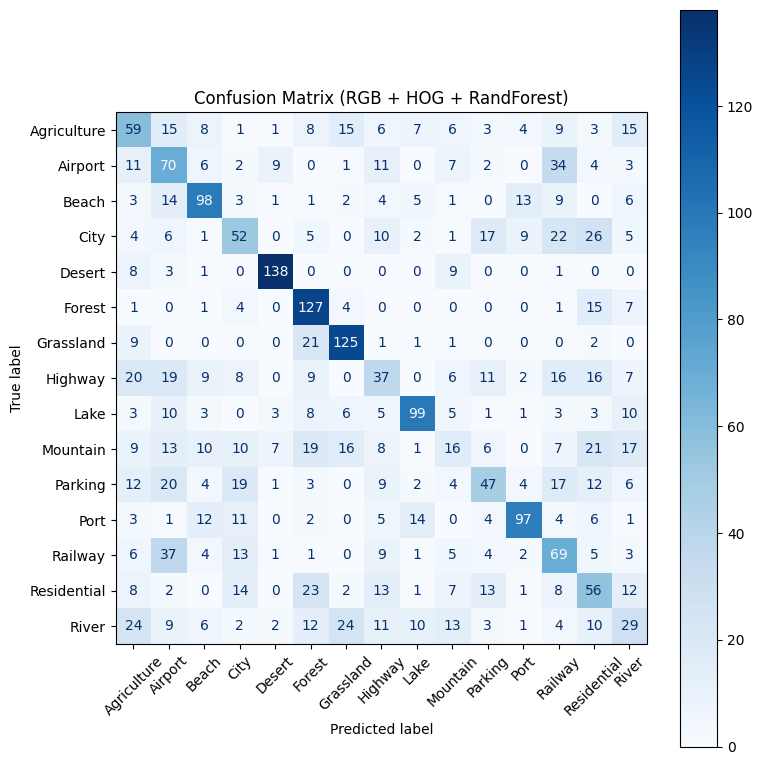

In [ ]:
print(f'Accuracy: {accuracy_score(test_y, pred) * 100:.2f}%')
print(classification_report(test_y, pred))

cm = confusion_matrix(test_y, pred)
cmdp = ConfusionMatrixDisplay(cm, display_labels=all_categories)
_, ax = plt.subplots(figsize=(8, 8))
cmdp.plot(cmap=plt.cm.Blues, xticks_rotation=45, ax=ax)
plt.title("Confusion Matrix (RGB + HOG + RandForest)")
plt.tight_layout()
plt.show()